## SimpleImputer
### This notebook outlines the usage of Simple Imputer (Univariate Imputation).
### Simple Imputer substitutes missing values statistics (mean, median, ...)
#### Dataset: [https://github.com/subashgandyer/datasets/blob/main/heart_disease.csv]

**Demographic**
- Sex: male or female(Nominal)
- Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral**
- Current Smoker: whether or not the patient is a current smoker (Nominal)
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical(history)**
- BP Meds: whether or not the patient was on blood pressure medication (Nominal)
- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
- Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
- Diabetes: whether or not the patient had diabetes (Nominal)

**Medical(current)**
- Tot Chol: total cholesterol level (Continuous)
- Sys BP: systolic blood pressure (Continuous)
- Dia BP: diastolic blood pressure (Continuous)
- BMI: Body Mass Index (Continuous)
- Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
- Glucose: glucose level (Continuous)

**Predict variable (desired target)**
- 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [26]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [27]:
df=pd.read_csv("heart_disease.csv")
df



,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


### How many Categorical variables in the dataset?

In [28]:

# Find categorical variables in the dataset
categorical_vars = df.select_dtypes(include=['object', 'category']).columns

# Display the categorical variables
print(f"Number of categorical variables: {len(categorical_vars)}")
print("Categorical variables:", categorical_vars.tolist())

# Display the first few rows of the dataframe
df.head()


Number of categorical variables: 0
Categorical variables: []


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### How many Missing values in the dataset?
Hint: df.Series.isna( ).sum( )

In [29]:
for i in range(len(df.columns)):
    missing_data = df.iloc[:, i].isna().sum() # include code here
    perc = missing_data / len(df) * 100
    
    print(f'Feature {i+1} >> Missing entries: {missing_data}  |  Percentage: {round(perc, 2)}')

Feature 1 >> Missing entries: 0  |  Percentage: 0.0
Feature 2 >> Missing entries: 0  |  Percentage: 0.0
Feature 3 >> Missing entries: 105  |  Percentage: 2.48
Feature 4 >> Missing entries: 0  |  Percentage: 0.0
Feature 5 >> Missing entries: 29  |  Percentage: 0.68
Feature 6 >> Missing entries: 53  |  Percentage: 1.25
Feature 7 >> Missing entries: 0  |  Percentage: 0.0
Feature 8 >> Missing entries: 0  |  Percentage: 0.0
Feature 9 >> Missing entries: 0  |  Percentage: 0.0
Feature 10 >> Missing entries: 50  |  Percentage: 1.18
Feature 11 >> Missing entries: 0  |  Percentage: 0.0
Feature 12 >> Missing entries: 0  |  Percentage: 0.0
Feature 13 >> Missing entries: 19  |  Percentage: 0.45
Feature 14 >> Missing entries: 1  |  Percentage: 0.02
Feature 15 >> Missing entries: 388  |  Percentage: 9.16
Feature 16 >> Missing entries: 0  |  Percentage: 0.0


### Bonus: Visual representation of missing values

<Axes: >

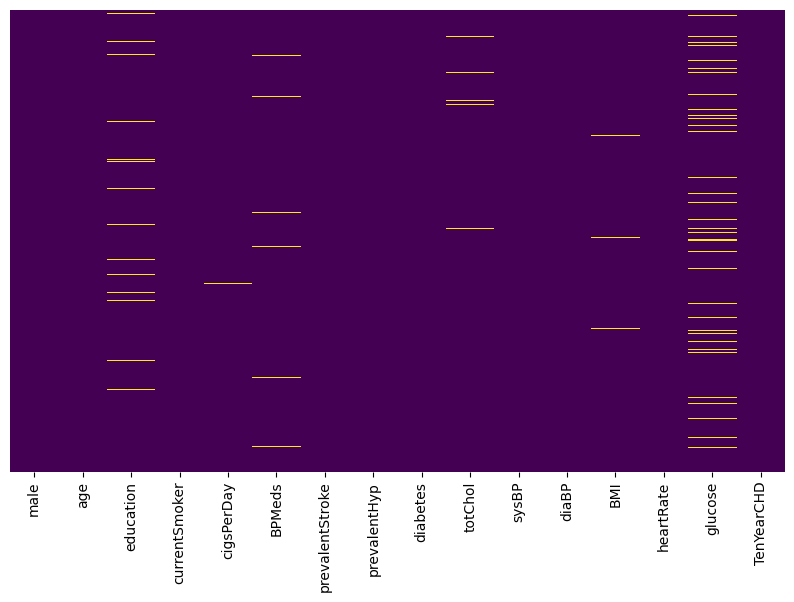

In [30]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Import SimpleImputer

In [31]:
from sklearn.impute import SimpleImputer

### Create SimpleImputer object with 'mean' strategy

In [32]:
imputer = SimpleImputer(strategy='mean')

### Optional - converting df into numpy array (There is a way to directly impute from dataframe as well)

In [33]:
data = df.values

In [34]:
X = data[:, :-1]
y = data[:, -1]

### Fit the imputer model on dataset to calculate statistic for each column

In [35]:
imputer.fit(X)



SimpleImputer()

### Trained imputer model is applied to dataset to create a copy of dataset with all filled missing values from the calculated statistic using transform( ) 

In [36]:

X_imputed = imputer.transform(X)


# Now X_imputed contains the same data as X but with missing values replaced by column means



# Get the feature names (assuming they're the column names from original df except the last one)
feature_names = df.columns[:-1]

# Create a new DataFrame with imputed values
df_imputed = pd.DataFrame(X_imputed, columns=feature_names)

# You can add the target variable back if needed
df_imputed[df.columns[-1]] = y

print("Original dataset shape:", X.shape)
print("Imputed dataset shape:", X_imputed.shape)
print("Number of missing values in original X:", np.isnan(X).sum())
print("Number of missing values in imputed X:", np.isnan(X_imputed).sum())

Original dataset shape: (4238, 15)
Imputed dataset shape: (4238, 15)
Number of missing values in original X: 645
Number of missing values in imputed X: 0


### Sanity Check: Whether missing values are filled or not

In [37]:
# Sanity check: total missing values in the transformed numpy array
print("Total missing values in X_imputed:", np.isnan(X_imputed).sum())

# Sanity check: missing values per column in the transformed DataFrame
print("\nMissing values per column in df_imputed:")
print(df_imputed.isnull().sum())



Total missing values in X_imputed: 0

Missing values per column in df_imputed:
male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


### Let's try to visualize the missing values.

<Axes: >

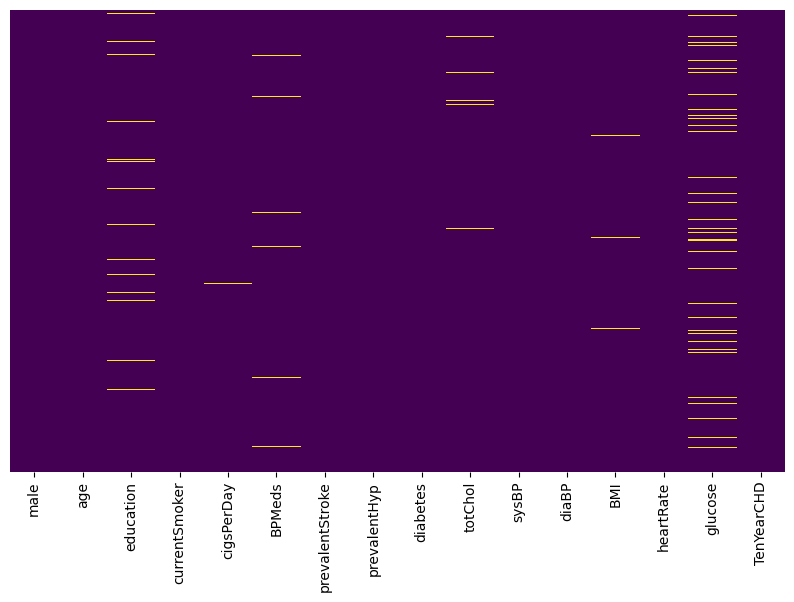

In [38]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

<Axes: >

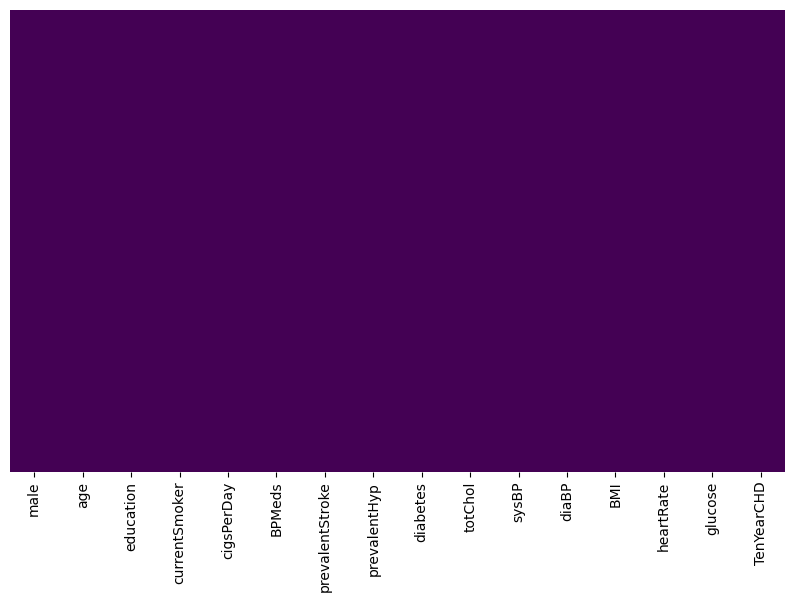

In [39]:
plt.figure(figsize=(10,6))
sns.heatmap(df_imputed.isna(), cbar=False, cmap='viridis', yticklabels=False)


### What's the issue here?
#### Hint: Heatmap needs a DataFrame and not a Numpy Array

<Axes: >

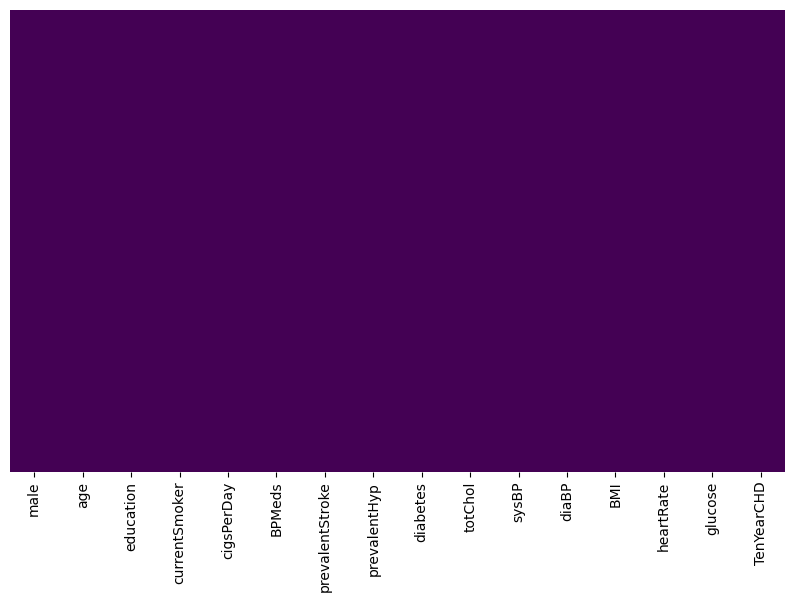

In [40]:
plt.figure(figsize=(10,6))
sns.heatmap(df_imputed.isna(), cbar=False, cmap='viridis', yticklabels=False)


# Check if these datasets contain missing data
### Load the datasets

In [41]:
X_train = pd.read_csv("X_train.csv")
Y_train = pd.read_csv("Y_train.csv")
Y_test = pd.read_csv("Y_test.csv")
X_test = pd.read_csv("X_test.csv")

In [42]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((384, 12), (384, 1), (96, 12), (96, 1))

<Axes: >

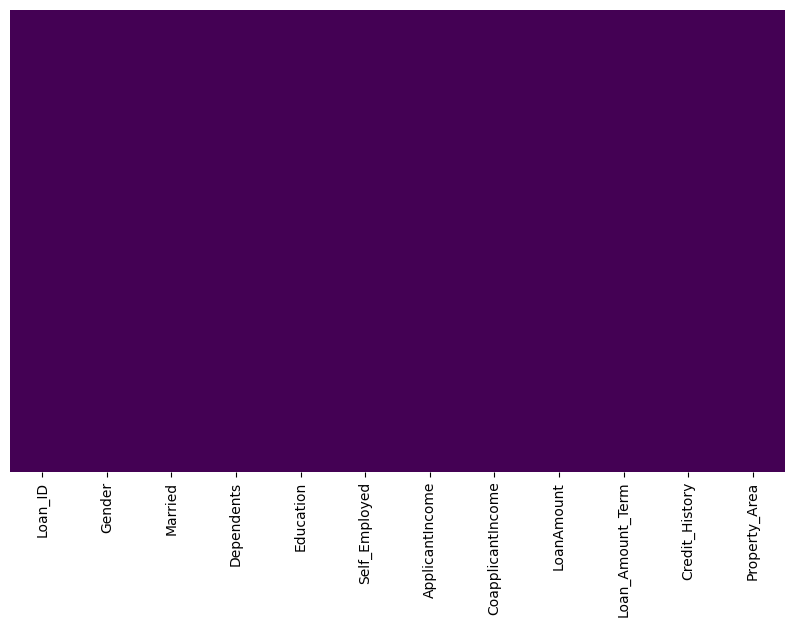

In [43]:
plt.figure(figsize=(10,6))
sns.heatmap(X_train.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Is there missing data in this dataset???

In [44]:
X_train.isna().sum()
Y_train.isna().sum()
X_test.isna().sum()
Y_test.isna().sum()

Target    0
dtype: int64

# Build a Logistic Regression model Without imputation

In [45]:


df = pd.read_csv("heart_disease.csv")

# Drop rows with missing values
df_dropna = df.dropna()

# Split into features and target
X = df_dropna[df_dropna.columns[:-1]]
y = df_dropna[df_dropna.columns[-1]]

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Build model
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

# Evaluate on training data (since no split is asked here)
y_pred = model.predict(X)
acc = accuracy_score(y, y_pred)

print("Accuracy without imputation (dropping NaNs):", acc)


Accuracy without imputation (dropping NaNs): 0.8544857768052516


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [47]:
model = LogisticRegression()

In [48]:
model.fit(X,y)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Drop all rows with missing entries - Build a Logistic Regression model and benchmark the accuracy

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [50]:
df=pd.read_csv("heart_disease.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [51]:
df.shape

(4238, 16)

### Drop rows with missing values

In [52]:
df_dropna = df.dropna()
print("Original dataset shape:", df.shape)
print("After dropping NaNs:", df_dropna.shape)

Original dataset shape: (4238, 16)
After dropping NaNs: (3656, 16)


### Split dataset into X and y

In [53]:
X = df_dropna[df_dropna.columns[:-1]]
y = df_dropna[df_dropna.columns[-1]]

### Create a pipeline with model parameter

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Create pipeline with Logistic Regression
model = Pipeline(steps=[
    ('logreg', LogisticRegression(max_iter=1000))
])

model


Pipeline(steps=[('logreg', LogisticRegression(max_iter=1000))])

### Create a RepeatedStratifiedKFold with 10 splits and 3 repeats and random_state=1

In [55]:
from sklearn.model_selection import RepeatedStratifiedKFold

# Create Repeated Stratified K-Fold CV
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

cv


RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1)

### Call cross_val_score with pipeline, X, y, accuracy metric and cv

In [56]:
from sklearn.model_selection import cross_val_score

# Evaluate model using cross-validation
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

print("Accuracy scores:", scores)
print("Mean accuracy: %.3f (std: %.3f)" % (scores.mean(), scores.std()))


0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0

Accuracy scores: [0.84972678 0.86065574 0.85519126 0.85519126 0.84972678 0.84153005
 0.84931507 0.86575342 0.84657534 0.85479452 0.86885246 0.85245902
 0.86065574 0.8442623  0.84699454 0.84972678 0.85753425 0.84931507
 0.85479452 0.84931507 0.85245902 0.86338798 0.85519126 0.8442623
 0.87431694 0.8442623  0.85205479 0.85479452 0.84657534 0.84931507]
Mean accuracy: 0.853 (std: 0.008)


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [57]:
scores

array([0.84972678, 0.86065574, 0.85519126, 0.85519126, 0.84972678,
       0.84153005, 0.84931507, 0.86575342, 0.84657534, 0.85479452,
       0.86885246, 0.85245902, 0.86065574, 0.8442623 , 0.84699454,
       0.84972678, 0.85753425, 0.84931507, 0.85479452, 0.84931507,
       0.85245902, 0.86338798, 0.85519126, 0.8442623 , 0.87431694,
       0.8442623 , 0.85205479, 0.85479452, 0.84657534, 0.84931507])

### Print the Mean Accuracy and Standard Deviation from scores

In [58]:
print(f"Mean Accuracy: {round(np.mean(scores), 3)}  | Std: {round(np.std(scores), 3)}")

Mean Accuracy: 0.853  | Std: 0.008


# Build a Logistic Regression model with SimpleImputer Mean Strategy

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [60]:
df=pd.read_csv("heart_disease.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


### Split dataset into X and y

In [61]:
df.shape

(4238, 16)

In [62]:
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [63]:
print("Dataset shape:", df.shape)
print("X shape:", X.shape)
print("y shape:", y.shape)

Dataset shape: (4238, 16)
X shape: (4238, 15)
y shape: (4238,)


### Create a SimpleImputer with mean strategy

In [64]:



imputer = SimpleImputer(strategy='mean')

imputer


SimpleImputer()

### Create a Logistic Regression model

In [65]:



logreg = LogisticRegression(max_iter=1000)

logreg


LogisticRegression(max_iter=1000)

### Create a pipeline with impute and model parameters

In [66]:

model = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('logreg', LogisticRegression(max_iter=1000))
])

model


Pipeline(steps=[('imputer', SimpleImputer()),
                ('logreg', LogisticRegression(max_iter=1000))])

### Create a RepeatedStratifiedKFold with 10 splits and 3 repeats and random_state=1

In [67]:

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

cv


RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1)

### Call cross_val_score with pipeline, X, y, accuracy metric and cv

In [68]:

scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [69]:
scores

array([0.85377358, 0.85613208, 0.84669811, 0.85613208, 0.86556604,
       0.85377358, 0.8490566 , 0.85377358, 0.85815603, 0.85815603,
       0.85141509, 0.84669811, 0.84198113, 0.86084906, 0.85141509,
       0.86084906, 0.8490566 , 0.85849057, 0.85815603, 0.86288416,
       0.85377358, 0.85849057, 0.8490566 , 0.84433962, 0.8490566 ,
       0.85141509, 0.8490566 , 0.86792453, 0.86052009, 0.85579196])

### Print the Mean Accuracy and Standard Deviation

In [70]:
print(f"Mean Accuracy: {round(np.mean(scores), 3)}  | Std: {round(np.std(scores), 3)}")

Mean Accuracy: 0.854  | Std: 0.006


### Which accuracy is better? 
- Dropping missing values
- SimpleImputer with Mean Strategy

In [71]:
print ("almost same")

almost same


# SimpleImputer Mean - Benchmark after Mean imputation with RandomForest

### Import libraries

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

### Create a SimpleImputer with mean strategy

In [73]:


imputer = SimpleImputer(strategy='mean')

imputer


SimpleImputer()

### Create a RandomForest model

In [74]:

rf_model = RandomForestClassifier(random_state=1)

rf_model


RandomForestClassifier(random_state=1)

### Create a pipeline

In [75]:
model = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('rf', RandomForestClassifier(random_state=1))
])

model

Pipeline(steps=[('imputer', SimpleImputer()),
                ('rf', RandomForestClassifier(random_state=1))])

### Create RepeatedStratifiedKFold

In [76]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
cv

RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1)

### Create Cross_val_score

In [77]:

scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores

array([0.85613208, 0.83726415, 0.8490566 , 0.84198113, 0.85613208,
       0.84669811, 0.85377358, 0.84433962, 0.86288416, 0.8534279 ,
       0.85141509, 0.84433962, 0.8490566 , 0.85141509, 0.85613208,
       0.8490566 , 0.84433962, 0.8490566 , 0.8534279 , 0.8534279 ,
       0.85141509, 0.85141509, 0.84669811, 0.84433962, 0.8490566 ,
       0.83962264, 0.84433962, 0.85377358, 0.8534279 , 0.85815603])

### Print Mean Accuracy and Standard Deviation

In [78]:
print("Mean Accuracy: %.3f" % scores.mean())
print("Standard Deviation: %.3f" % scores.std())


Mean Accuracy: 0.850
Standard Deviation: 0.006


# Assignment
# Run experiments with different Strategies and different algorithms

## STRATEGIES
- Mean
- Median
- Most_frequent
- Constant

## ALGORITHMS
- Logistic Regression
- KNN
- Random Forest
- SVM
- Any other algorithm of your choice

#### Hint: Collect the pipeline creation, KFold, and Cross_Val_Score inside a for loop and iterate over different strategies in a list and different algorithms in a list

In [79]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

# Define strategies and algorithms
strategies = ["mean", "median", "most_frequent", "constant"]

algorithms = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=1),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=1)  # extra choice
}

# Cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Run experiments
results = []

for strat in strategies:
    for name, algo in algorithms.items():
        # Create pipeline
        model = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy=strat)),
            ('model', algo)
        ])
        
        # Evaluate with CV
        scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
        
        # Collect results
        results.append((strat, name, scores.mean(), scores.std()))

        # Print progress
        print(f"Strategy={strat}, Algorithm={name}, Accuracy={scores.mean():.3f} (+/- {scores.std():.3f})")


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Strategy=mean, Algorithm=Logistic Regression, Accuracy=0.854 (+/- 0.006)
Strategy=mean, Algorithm=KNN, Accuracy=0.837 (+/- 0.009)
Strategy=mean, Algorithm=Random Forest, Accuracy=0.850 (+/- 0.006)
Strategy=mean, Algorithm=SVM, Accuracy=0.848 (+/- 0.002)
Strategy=mean, Algorithm=Gradient Boosting, Accuracy=0.846 (+/- 0.008)


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Strategy=median, Algorithm=Logistic Regression, Accuracy=0.854 (+/- 0.006)
Strategy=median, Algorithm=KNN, Accuracy=0.836 (+/- 0.008)
Strategy=median, Algorithm=Random Forest, Accuracy=0.850 (+/- 0.006)
Strategy=median, Algorithm=SVM, Accuracy=0.848 (+/- 0.002)
Strategy=median, Algorithm=Gradient Boosting, Accuracy=0.846 (+/- 0.009)


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Strategy=most_frequent, Algorithm=Logistic Regression, Accuracy=0.854 (+/- 0.005)
Strategy=most_frequent, Algorithm=KNN, Accuracy=0.835 (+/- 0.009)
Strategy=most_frequent, Algorithm=Random Forest, Accuracy=0.849 (+/- 0.006)
Strategy=most_frequent, Algorithm=SVM, Accuracy=0.848 (+/- 0.002)
Strategy=most_frequent, Algorithm=Gradient Boosting, Accuracy=0.846 (+/- 0.007)


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Strategy=constant, Algorithm=Logistic Regression, Accuracy=0.853 (+/- 0.006)
Strategy=constant, Algorithm=KNN, Accuracy=0.837 (+/- 0.010)
Strategy=constant, Algorithm=Random Forest, Accuracy=0.848 (+/- 0.006)
Strategy=constant, Algorithm=SVM, Accuracy=0.848 (+/- 0.002)
Strategy=constant, Algorithm=Gradient Boosting, Accuracy=0.846 (+/- 0.008)


# Q1: Which is the best strategy for this dataset using Random Forest algorithm?
- MEAN
- MEDIAN
- MOST_FREQUENT
- CONSTANT

In [80]:
import pandas as pd

# Put results into a DataFrame
results_df = pd.DataFrame(results, columns=["Strategy", "Algorithm", "Mean Accuracy", "Std"])

# Filter only Random Forest
rf_results = results_df[results_df["Algorithm"] == "Random Forest"]

# Show sorted by accuracy
rf_results.sort_values(by="Mean Accuracy", ascending=False)


,Strategy,Algorithm,Mean Accuracy,Std
2,mean,Random Forest,0.849853,0.005624
7,median,Random Forest,0.849776,0.006193
12,most_frequent,Random Forest,0.849381,0.005567
17,constant,Random Forest,0.848044,0.006220


# Q2:  Which is the best algorithm for this dataset using Mean Strategy?
- Logistic Regression
- Random Forest
- KNN
- any other algorithm of your choice (BONUS)

In [81]:
# Filter only Mean strategy
mean_results = results_df[results_df["Strategy"] == "mean"]

# Show sorted by accuracy
mean_results.sort_values(by="Mean Accuracy", ascending=False)


,Strategy,Algorithm,Mean Accuracy,Std
0,mean,Logistic Regression,0.854415,0.006135
2,mean,Random Forest,0.849853,0.005624
3,mean,SVM,0.848435,0.001671
4,mean,Gradient Boosting,0.846472,0.008060
1,mean,KNN,0.836716,0.008642


# Q3: Which is the best combination of algorithm and best Imputation Strategy overall?
- Mean , Median, Most_frequent, Constant
- Logistic Regression, Random Forest, KNN

In [ ]:
# Sort results to find the best combo overall
best_combo = results_df.sort_values(by="Mean Accuracy", ascending=False).head(3)
best_combo


,Strategy,Algorithm,Mean Accuracy,Std
0,mean,Logistic Regression,0.854415,0.006135
5,median,Logistic Regression,0.854021,0.005906
10,most_frequent,Logistic Regression,0.853864,0.005492


Exception ignored in: <function ResourceTracker.__del__ at 0x104279f80>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x103d45f80>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x103951f80>
Traceback (most recent call last